      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
Dataset shape: (506, 14)
Null values in each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64
Column names: Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b'

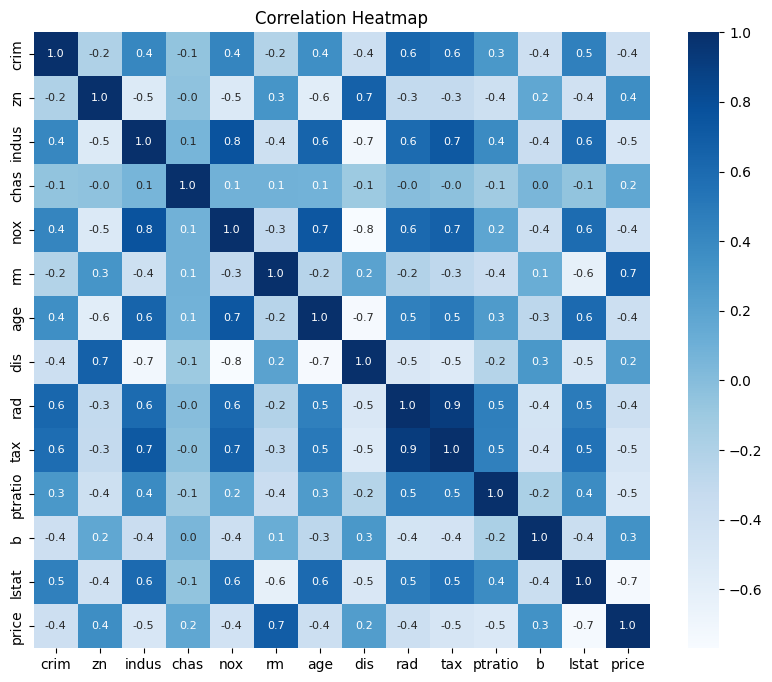

X_train shape: (404, 13)
X_test shape: (102, 13)
Y_train shape: (404,)
Y_test shape: (102,)
Linear Regression Model - R² Score: 0.7275
Linear Regression Model - Mean Absolute Error: 3.3917
XGB Regressor Model - R² Score: 1.0000
XGB Regressor Model - Mean Absolute Error: 0.0112
Predicted Price by Linear Regression: 28.70
Predicted Price by XGB Regressor: 23.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

# Load the dataset
dataset = pd.read_csv('BostonHousing.csv')  # Ensure the correct path to your CSV file

# Display first 5 rows to understand the data
print(dataset.head())

# Check the shape (number of rows and columns)
print("Dataset shape:", dataset.shape)

# Check for null values in the dataset columns
print("Null values in each column:\n", dataset.isnull().sum())

# Check the column names to ensure they are set correctly
print("Column names:", dataset.columns)

# Correlation matrix to understand relationships between features
correlation = dataset.corr()

# Plotting the heatmap for correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size": 8}, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# Define features (X) and target variable (Y)
X = dataset.drop('price', axis=1)  # all columns except 'price'
Y = dataset['price']  # target variable

# Split dataset into training and testing sets (80% train, 20% test), shuffle with random_state=31 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=31)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# Initialize and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

# Make predictions on training data
Y_train_pred_lr = model_lr.predict(X_train)

# Evaluate Linear Regression model
r2_score_lr = metrics.r2_score(Y_train, Y_train_pred_lr)
mae_lr = metrics.mean_absolute_error(Y_train, Y_train_pred_lr)
print(f"Linear Regression Model - R² Score: {r2_score_lr:.4f}")
print(f"Linear Regression Model - Mean Absolute Error: {mae_lr:.4f}")

# Initialize and train the XGB Regressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

# Make predictions on training data using XGBRegressor
Y_train_pred_xgb = model_xgb.predict(X_train)

# Evaluate XGB Regressor model
r2_score_xgb = metrics.r2_score(Y_train, Y_train_pred_xgb)
mae_xgb = metrics.mean_absolute_error(Y_train, Y_train_pred_xgb)
print(f"XGB Regressor Model - R² Score: {r2_score_xgb:.4f}")
print(f"XGB Regressor Model - Mean Absolute Error: {mae_xgb:.4f}")

# Example input prediction (ensure it has the same number of features as the training data)
# Adjust the input data to include all features used in training
input_data = np.array([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 1, 296.0, 15.3, 396.9, 4.98]])  # Add a placeholder for the 14th feature

# Make predictions using the Linear Regression model
price_pred_lr = model_lr.predict(input_data)
print(f"Predicted Price by Linear Regression: {price_pred_lr[0]:.2f}")

# Make predictions using the XGB Regressor model
price_pred_xgb = model_xgb.predict(input_data)
print(f"Predicted Price by XGB Regressor: {price_pred_xgb[0]:.2f}")

In [6]:
import pickle
pickle.dump(model_lr,open('house_price_prediction.pkl','wb'))